In [2]:
import torch 
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import CustomTransformer as ct
%inline matplotlib


UsageError: Line magic function `%inline` not found.


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:

data = pd.read_table('fra.txt', header= None)

In [5]:
data.rename(columns= {0: 'English', 1: 'French', 2: 'Citation'}, inplace= True)

In [6]:
pattern = r"[!'#$%&()*+,-./:;<=>?@[\]^`{|}~“”‘’«»‹›„‚–—…·•¡¿’\"\']"

eng_sent, french_sent = [], []

for e in range(len(data['English'])):
    eng_sent.append(re.sub(pattern, "", data['English'][e]))
    french_sent.append(re.sub(pattern, "", data['French'][e]))

In [7]:
print(len(eng_sent))
print(len(french_sent))

229803
229803


In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_small_tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-small-uncased")

In [9]:
eng_token = [tokenizer.encode(text, add_special_tokens= True) for text in eng_sent]
fren_token = [tokenizer.encode(text, add_special_tokens= True) for text in french_sent]

In [10]:
model = BertModel.from_pretrained('bert-base-uncased')

In [11]:
def padding(tokens, max_len):
    temp = []
    for token in tokens:
        if max_len > len(token):
            temp.append(token + [tokenizer.pad_token_id 
                                 for i in range(max_len - len(token))])
        else:
            temp.append(token[:max_len])

    return temp

In [12]:
def text_embedding(batch_tokens, max_len):
    batch_padded_tokens = padding(batch_tokens, max_len)
    tokens_tensor = torch.tensor(batch_padded_tokens).to(device)
    with torch.no_grad():
        output = model(tokens_tensor)
        embeddings = output.last_hidden_state
    return embeddings

Average len: 8


{'whiskers': [<matplotlib.lines.Line2D at 0x2becf1600>,
 'caps': [<matplotlib.lines.Line2D at 0x2becf1b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2becf1360>],
 'medians': [<matplotlib.lines.Line2D at 0x2becf2080>],
 'fliers': [<matplotlib.lines.Line2D at 0x2becf2650>],
 'means': [<matplotlib.lines.Line2D at 0x2becf2290>]}

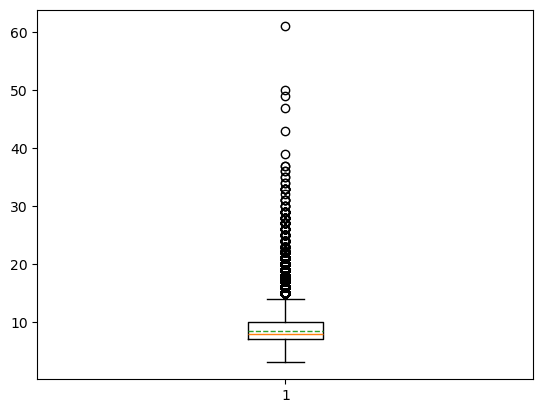

In [13]:
eng_sum = 0
eng_token_len = []
for tokens in eng_token:
    eng_sum += len(tokens)
    eng_token_len.append(len(tokens))

eng_avg_len = eng_sum // len(eng_token)
print("Average len: {}".format(eng_avg_len))
plt.boxplot(eng_token_len, meanline= True, showmeans= True)

Average len: 12


{'whiskers': [<matplotlib.lines.Line2D at 0x2c24f9c00>,
 'caps': [<matplotlib.lines.Line2D at 0x2c24fa020>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c24f9960>],
 'medians': [<matplotlib.lines.Line2D at 0x2c24fa560>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c24faaa0>],
 'means': [<matplotlib.lines.Line2D at 0x2c24fa800>]}

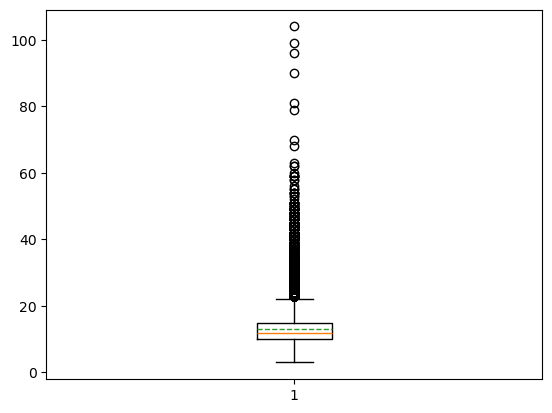

In [14]:
fren_sum = 0
fren_token_len = []
for tokens in fren_token:
    fren_sum += len(tokens)
    fren_token_len.append(len(tokens))

fren_avg_len = fren_sum // len(fren_token)

print("Average len: {}".format(fren_avg_len))
plt.boxplot(fren_token_len, meanline= True, showmeans= True)

In [16]:
eng_token[0]

[101, 2175, 102]

In [17]:
fren_token[0]

[101, 12436, 102]

In [18]:
vocab = len(tokenizer.vocab)

In [19]:
max_len = 104

In [21]:
eng_token_padded = padding(eng_token, max_len)
fren_token_padded = padding(fren_token, max_len)

In [26]:
from sklearn.model_selection import train_test_split

src_train, src_test, trg_train, trg_test = train_test_split(eng_token_padded, fren_token_padded)

In [28]:
src_train

[[101,
  10047,
  15936,
  2000,
  2963,
  2008,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  1045,
  2288,
  2026,
  2606,
  3013,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [40]:
def predict(output):
    prediction = []
    for predict in output:
        temp = []
        for probab in predict:
            # In the predict function:
            temp.append(torch.tensor(torch.argmax(probab)))

        prediction.append(temp)

    return torch.tensor(prediction)    

In [75]:
device = torch. device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.tensor([eng_token[0]]).float().requires_grad_().to(device)
trg = torch.tensor([fren_token[0]]).float().requires_grad_().to(device)
src_pad_idx = 0
trg_pad_idx = 0
src_vocab_size = vocab
trg_vocab_size = vocab
learning_rate = 0.001
epochs = 10
training_batch_size = 100

model = ct.Transformer(src_vocab_size, trg_vocab_size, src_pad_idx, trg_pad_idx, 
                       embed_size= 104, device= device, max_length= 104).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
criterion = torch.nn.functional.cross_entropy

for epoch in range(epochs):
    print("Epoch: {}".format(epoch + 1))
    for batch in tqdm(range(0, len(src_train), training_batch_size), "Training", colour= "green"):
        src = torch.tensor(src_train[batch: batch + training_batch_size]).to(device)
        trg = torch.tensor(trg_train[batch: batch + training_batch_size]).to(device)

        optimizer.zero_grad()
        output = model(src, trg)
        loss = criterion(predict(output).float().requires_grad_(), (trg[:, :]).float().requires_grad_())
        loss.backward()
        optimizer.step()
    print("Loss value: {}".format(loss.item))


Epoch: 1


Training:   0%|          | 0/1724 [00:00<?, ?it/s]/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/var/folders/db/b5f15h0x69l1lpn95hn5mgpm0000gn/T/ipykernel_1237/2116079549.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp.append(torch.tensor(torch.argmax(probab)))
Training: 100%|██████████| 1724/1724 [36:21<00:00,  1.27s/it]


Epoch: 2


Training:  26%|██▌       | 443/1724 [08:49<25:18,  1.19s/it]

In [55]:
temp = predict(output)
print(predict(output).shape)

/var/folders/db/b5f15h0x69l1lpn95hn5mgpm0000gn/T/ipykernel_1237/2116079549.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp.append(torch.tensor(torch.argmax(probab)))


torch.Size([100, 104])


In [70]:
model.parameters

<bound method Module.parameters of Transformer(
  (encoder): Encoder(
    (word_embedding): Embedding(30522, 104)
    (position_embedding): Embedding(104, 104)
    (layers): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): SelfAttention(
          (values): Linear(in_features=13, out_features=13, bias=False)
          (keys): Linear(in_features=13, out_features=13, bias=False)
          (queries): Linear(in_features=13, out_features=13, bias=False)
          (fc_out): Linear(in_features=104, out_features=104, bias=True)
        )
        (norm1): LayerNorm((104,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((104,), eps=1e-05, elementwise_affine=True)
        (feed_forward): Sequential(
          (0): Linear(in_features=104, out_features=416, bias=True)
          (1): ReLU()
          (2): Linear(in_features=416, out_features=104, bias=True)
        )
        (dropout): Dropout(p=0, inplace=False)
      )
    )
    (dropout): Dropout(p=0, inplace=Fa

In [33]:
eng_token[-1]

[101,
 1045,
 2253,
 5948,
 2007,
 2028,
 1997,
 2026,
 6898,
 2015,
 2814,
 1998,
 2085,
 2002,
 2015,
 9943,
 2012,
 2033,
 2001,
 2023,
 2767,
 1037,
 3124,
 2030,
 1037,
 2611,
 1037,
 3124,
 5525,
 2339,
 2052,
 1045,
 2175,
 5948,
 2007,
 2010,
 2931,
 2814,
 3398,
 2115,
 2063,
 2157,
 2010,
 2171,
 2003,
 3419,
 2002,
 2015,
 2428,
 2980,
 1998,
 1045,
 2428,
 2215,
 2000,
 2175,
 5948,
 2007,
 2032,
 2153,
 102]

In [34]:
tokenizer.decode()

'[CLS] i went drinking with one of my boyfriends friends and now hes furious at me was this friend a guy or a girl a guy obviously why would i go drinking with his female friends yeah youre right his name is tom hes really hot and i really want to go drinking with him again [SEP]'